# 第一部分：產生蒙地卡羅結果

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

df1 = pd.read_csv('/Users/Kang/Desktop/HW1/Betterment.csv')
df2 = pd.read_csv('/Users/Kang/Desktop/HW1/WiseBanyan.csv')
df3 = pd.read_csv('/Users/Kang/Desktop/HW1/Charles_Schwab.csv')
df4 = pd.read_csv('/Users/Kang/Desktop/HW1/Ellevest.csv')

df1.set_index("Date", inplace=True)
df2.set_index("Date", inplace=True)
df3.set_index("Date", inplace=True)
df4.set_index("Date", inplace=True)

all_frame = [df1, df2, df3, df4]
name = ['Betterment', 'WiseBanyan', 'Charles_Schwab', 'Ellevest']

In [14]:
def gen_wei(num):
    mylist = []
    for i in range(num):
        mylist.append(random.random())
    
    s = sum(mylist)
    for j in range(num):
        mylist[j] = mylist[j] / s
    
    return mylist

In [15]:
def gen_result(dataframe, times = 1000):
    
    #透過輸入的dataframe取得columns
    title = dataframe.columns.tolist()
    
    #建立一個新的dataframe來存隨機資料
    df = pd.DataFrame()
    
    #再用另一個dataframe來存前一資料裡，每次隨機所產生的期望值、標準差
    result = pd.DataFrame(columns = ('stdev', 'mean'))
    
    #隨機次數
    for t in range(times):
        
        #每次隨機均利用先前函數，重新生成一組權重
        weight = gen_wei(len(title))
        
        #將每一檔商品乘上權重，為一個單位之價值，並且取變化百分比（報酬率）
        df[t] = (sum(dataframe[title[k]] * weight[k] for k in range(len(title)))).pct_change()
        
        #計算出報酬率之平均及標準差，加入result裡
        result = result.append({'stdev' : df[t].std() * math.sqrt(252), 'mean' : df[t].mean() * 252}, ignore_index = True)
        
    return result

How many times of MonteCarlo you want for each company? 


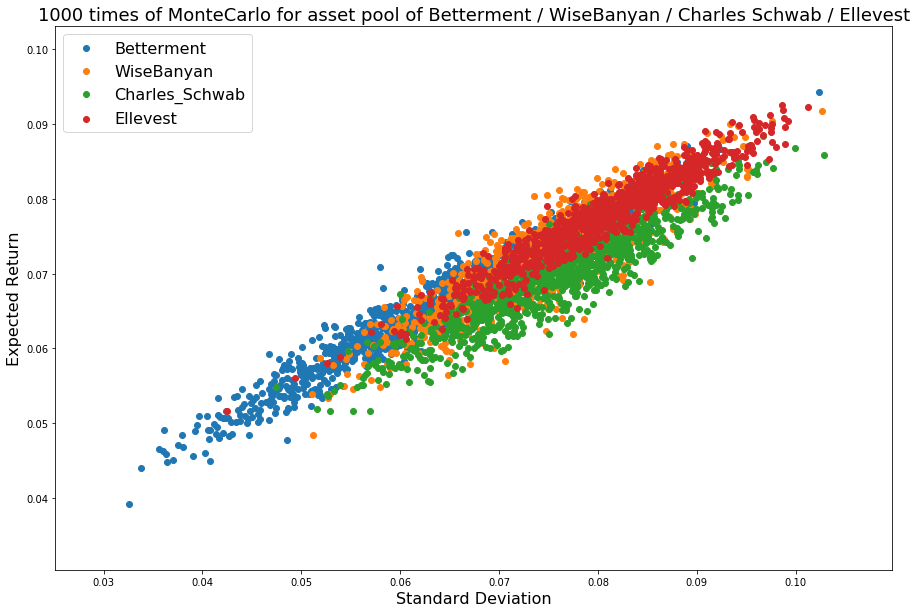

In [16]:
times = input('How many times of MonteCarlo you want for each company? ')
all_data = {}
plt.figure(figsize=(15,10))

for no in range(len(all_frame)):
    
    #將四家公司投組逐一代入gen_result裡產生蒙地卡羅結果，生成test行並排列
    result =  gen_result(all_frame[no])
    result['test'] = round(result['stdev'], 3)
    result = result[['test', 'stdev', 'mean']]
    #res = result.sort_values(by=['test'])
    
    #將結果存到一個字典裡，用公司名當key
    all_data[name[no]] = result
    
    #畫圖，最後一起print出
    plt.scatter(result['stdev'], result['mean'])

#產生圖之資訊
plt.legend(name, loc = 'best', prop = {'size' : 16})
plt.xlabel('Standard Deviation', size = 16)
plt.ylabel('Expected Return', size = 16)

if times == "":
    plt.title('1000 times of MonteCarlo for asset pool of Betterment / WiseBanyan / Charles Schwab / Ellevest', size = 18)
else:
    plt.title(times + ' times of MonteCarlo for asset pool of Betterment / WiseBanyan / Charles Schwab / Ellevest', size = 18)

# 第二部分：畫出效率前緣

In [17]:
#range的小數版
def frange(start, stop=None, step=None):
    #Use float number in range() function
    # if stop and step argument is null set start=0.0 and step = 1.0
    if stop == None:
        stop = start + 0.0
        start = 0.0
    if step == None:
        step = 1.0
    while True:
        if step > 0 and start >= stop:
            break
        elif step < 0 and start <= stop:
            break
        yield ("%g" % start) # return float number
        start = start + step

In [18]:
def get_line_graph(result):
    plot = pd.DataFrame(columns = ('stdev', 'mean'))

    for i in frange(result.test.min(), result.test.max(), 0.001):
        if float(i) in result['test'].tolist():
            m = result.loc[result['test'] == float(i), 'mean'].values.max()
            s = result.loc[result['mean'] == m, 'stdev'].values[0]
            plot = plot.append({'stdev' : s, 'mean' : m}, ignore_index = True)
        else:
            pass
    return plot

Text(0, 0.5, 'Expected Return')

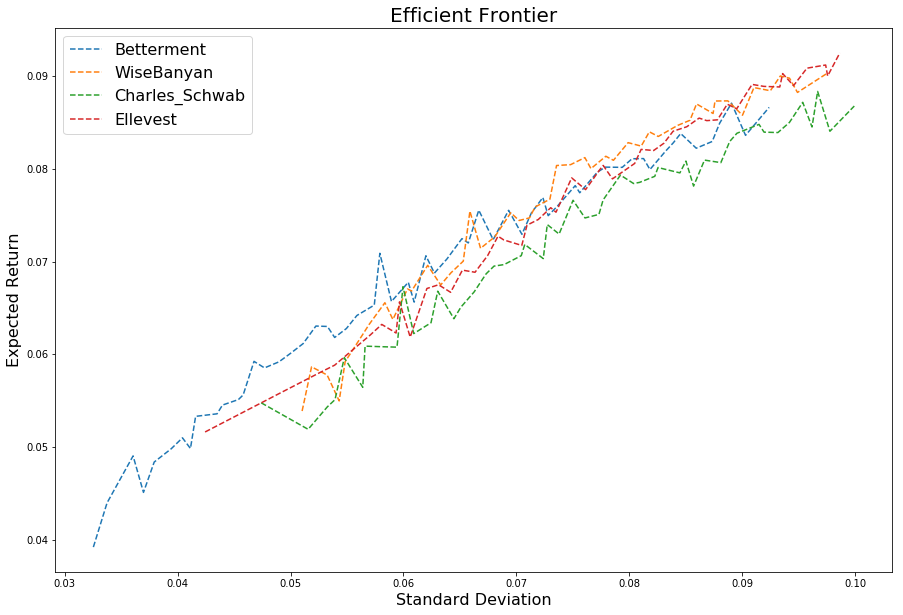

In [19]:
plt.figure(figsize=(15,10))
for no in range(len(all_data)):
    
    #用先前蒙地卡羅結果畫出效率前緣，一起印出來
    plot = get_line_graph(all_data[name[no]])
    x = plot['stdev']
    y = plot['mean']
    plt.plot(x , y, '--')

plt.title('Efficient Frontier', size = 20)
plt.legend(name, loc = 'best', prop = {'size' : 16})
plt.xlabel('Standard Deviation', size = 16)
plt.ylabel('Expected Return', size = 16)